#**Graded Challenge 3**

#By : Muhammad Rizki Herfian (Batch 004)

#**STEP 1 : INTRODUCTION**:

> *Graded Challenge 3* ini dibuat guna mengevaluasi Practical Statistics sebagai berikut:
- Mampu memuat data dengan Pandas 
- Mampu menangani missing values pada dataset
- Mampu melakukan manipulasi kolom
- Mampu membuat query terhadap dataset
- Mampu melakukan grouping terhadap dataset
- Mampu melakukan visualisasi sederhana menggunakan Pandas


#**STEP 2: IMPORT LIBRARY**
Bagian pertama pada notebook ini berisi importing semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fungsi melakukan `'display.float_format'` berguna untuk hanya mengambil 3 angka dibelakang koma untuk nilai float yang memiliki nilai angka dibelakang koma terlalu banyak (e).

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Import drive untuk mengkoneksikan google collab dengan google drive dan collab bisa mengakses file yang ada di google drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**STEP 3: DATA LOADING**
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

Membaca data yang tersimpan di path google drive:

In [4]:
datas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Graded Challenge/ks-projects-201801.csv')

Setelah berhasil membaca data, kemudian melakukan eksplorasi data secara sederhana.

In [5]:
datas.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17 03:24:11,1.000,failed,1,US,1.000,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04 08:35:03,1283.000,canceled,14,US,1283.000,1283.000,19500.000
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.000,2016-02-26 13:38:27,52375.000,successful,224,US,52375.000,52375.000,50000.000
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.000,2014-12-01 18:30:44,1205.000,successful,16,US,1205.000,1205.000,1000.000
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.000,2016-02-01 20:05:12,453.000,failed,40,US,453.000,453.000,25000.000
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.000,2014-04-24 18:14:43,8233.000,canceled,58,US,8233.000,8233.000,125000.000
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.000,2014-07-11 21:55:48,6240.570,canceled,43,US,6240.570,6240.570,65000.000


In [6]:
datas[15000:1510]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


In [7]:
datas.tail(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378651,999969812,AT THE BEACH,Classical Music,Music,CAD,2014-03-22,5000.000,2014-02-20 01:00:16,5501.000,successful,78,CA,5019.920,4983.690,4529.810
378652,999971898,Beach Wrestling Documentary,Documentary,Film & Video,NOK,2015-04-28,20000.000,2015-03-29 21:30:33,21500.000,successful,36,NO,2698.970,2875.830,2675.190
378653,999972264,Islanda,Documentary,Film & Video,USD,2012-03-16,1700.000,2012-02-15 04:31:10,25.000,failed,1,US,25.000,25.000,1700.000
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.000,2017-03-20 22:08:22,154.000,failed,4,US,0.000,154.000,6500.000
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20,5500.000,2014-08-06 03:46:07,0.000,canceled,0,CA,0.000,0.000,4949.600
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.000,2014-09-17 02:35:30,25.000,canceled,1,US,25.000,25.000,50000.000
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.000,2011-06-22 03:35:14,155.000,failed,5,US,155.000,155.000,1500.000
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.000,2010-07-01 19:40:30,20.000,failed,1,US,20.000,20.000,15000.000
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.000,2016-01-13 18:13:53,200.000,failed,6,US,200.000,200.000,15000.000
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.000,2011-07-19 09:07:47,524.000,failed,17,US,524.000,524.000,2000.000


`.shape` untuk melihat jumlah banyak baris dan kolom

In [8]:
datas.shape

(378661, 15)

`.info` untuk melihat data lebih detail dari `.shape` dan diketahui juga tipe data dari tiap kolom.

In [9]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


`.isnull().sum()` untuk melihat kolom yang memiliki nilai nan

In [10]:
datas.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [11]:
datas.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000,378661.000,378661.000,378661.000,374864.000,378661.000,378661.000
mean,1074731191.989,49080.792,9682.979,105.617,7036.729,9058.924,45454.401
std,619086204.323,1183391.259,95636.010,907.185,78639.745,90973.343,1152950.055
min,5971.000,0.010,0.000,0.000,0.000,0.000,0.010
25%,538263516.000,2000.000,30.000,2.000,16.980,31.000,2000.000
50%,1075275634.000,5200.000,620.000,12.000,394.720,624.330,5500.000
75%,1610148624.000,16000.000,4076.000,56.000,3034.090,4050.000,15500.000
max,2147476221.000,100000000.000,20338986.270,219382.000,20338986.270,20338986.270,166361390.710


#**STEP 4: DATA CLEANING**
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

Pertama melakukan copy pada datas untuk menyimpan formasi data asli.

In [12]:
dtc = datas.copy()

Mengisi missing values pada kolom name dan usd pledged dengan nilai sebagai berikut:

In [13]:
dtc['name'].fillna('-', inplace =True)
dtc['usd pledged'].fillna(0, inplace =True)

Cek kembali apakah masih terdapat missing values.

In [14]:
dtc.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

merubah nama kolom usd pledged, mengganti spasi dengan _ untuk memudahkan pengelolaan data.

In [15]:
dtc = dtc.rename(columns = {"usd pledged" : "usd_pledged"})

`.columns` mengecek semua kolom yang tersedia pada data.

In [16]:
datas.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

#**STEP 5: EXPLORASI DATA**
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

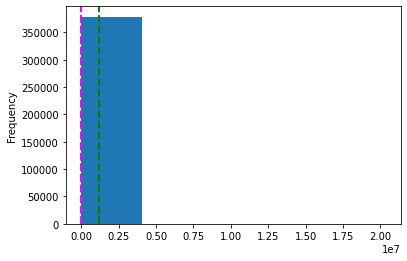

In [17]:
dtc['usd_pledged_real'].plot.hist(bins=5)
plt.axvline(dtc['pledged'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(dtc['pledged'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(dtc['pledged'].describe()['mean'] + dtc['goal'].describe()['std'], color='green', linestyle='dashed', linewidth=2)

#**STEP 6 : Measure of Central Tendency**
Nilai yang akan dicari adalah:
*   Mean (Nilai rata-rata)
*   Median (Nilai tengah)
*   Mode (Nilai yang paling sering muncul)

Pada tiap-tiap kolom, berikut perintahnya :




In [18]:
CT1 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT1:
    print ('Mean ' + dtc[col].name + ' = ' + str(dtc[col].mean()))

Mean goal = 49080.79152056854
Mean pledged = 9682.97933946224
Mean backers = 105.61747578969052
Mean usd_pledged = 6966.168499106134
Mean usd_pledged_real = 9058.924074119337
Mean usd_goal_real = 45454.40146545336


In [19]:
CT2 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT2:
    print ('Median ' + dtc[col].name + ' = ' + str(dtc[col].median()))

Median goal = 5200.0
Median pledged = 620.0
Median backers = 12.0
Median usd_pledged = 375.0
Median usd_pledged_real = 624.33
Median usd_goal_real = 5500.0


In [20]:
CT3 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT3:
    print ('Modus ' + dtc[col].name + ' = ' + str(dtc[col].mode()[0]))

Modus goal = 5000.0
Modus pledged = 0.0
Modus backers = 0
Modus usd_pledged = 0.0
Modus usd_pledged_real = 0.0
Modus usd_goal_real = 5000.0


##**STEP 7 : Measure of Variance**
Nilai yang ingin saya cari dari konsep variance adalah :
*   Measure of Variance: Range
*   Measure of Variance: Variance
*   Measure of Variance: Standard Deviation

Berikut perintahnya :



In [21]:
VarR = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in VarR:
    print ('Range ' + dtc[col].name + ' = ' + str(dtc[col].max() - dtc[col].min()))

Range goal = 99999999.99
Range pledged = 20338986.27
Range backers = 219382
Range usd_pledged = 20338986.27
Range usd_pledged_real = 20338986.27
Range usd_goal_real = 166361390.70000002


In [22]:
Var = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in Var:
    print ('Varians ' + dtc[col].name + ' = ' + str(dtc[col].var()))

Varians goal = 1400414872097.0361
Varians pledged = 9146246409.673967
Varians backers = 822984.6873539966
Varians usd_pledged = 6122689132.431702
Varians usd_pledged_real = 8276149156.121636
Varians usd_goal_real = 1329293829528.3057


In [23]:
VarSt = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in VarSt:
    print ('Standard Derivation ' + dtc[col].name + ' = ' + str(dtc[col].std()))

Standard Derivation goal = 1183391.2590927128
Standard Derivation pledged = 95636.01000498697
Standard Derivation backers = 907.1850347938928
Standard Derivation usd_pledged = 78247.6142283693
Standard Derivation usd_pledged_real = 90973.34310731708
Standard Derivation usd_goal_real = 1152950.0550883831


Tambahan mencari nilau Quantile.

In [24]:
QT = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in QT:
    print ('Quantile ' + dtc[col].name + ' = ' + str(dtc[col].quantile(0.75) - dtc[col].quantile(0.25)))

Quantile goal = 14000.0
Quantile pledged = 4046.0
Quantile backers = 54.0
Quantile usd_pledged = 2986.55
Quantile usd_pledged_real = 4019.0
Quantile usd_goal_real = 13500.0


##**STEP 8 : Confidence Intervals**
Mengimplementasikan Confidence Intervals	

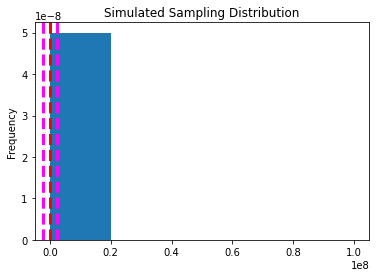

Sampling Mean: 49080.79152056854
Sampling StdErr: 1183391.2590927128
95% Confidence Interval: (-2270323.455920656, 2368485.0389617933)


In [25]:
#GOAL
goal = dtc['goal']
ma = goal.mean()
sd = goal.std()
ci = stats.norm.interval(0.95, ma, sd)

# Plot the distribution, mean, and CI
goal.plot.hist(title='Simulated Sampling Distribution', bins=5, density=True) 
plt.axvline(ma, color='red', linestyle='dashed', linewidth=3)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(ma))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

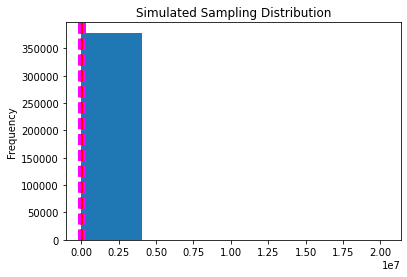

Sampling Mean: 9682.97933946224
Sampling StdErr: 95636.01000498697
95% Confidence Interval: (-177760.15589542448, 197126.11457434896)


In [26]:
#PLEDGED
pledg = dtc['pledged']
m = pledg.mean()
sd = pledg.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
pledg.plot.hist(title='Simulated Sampling Distribution', bins=5) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=3)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

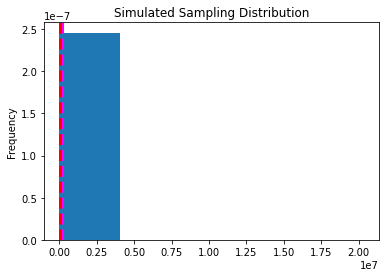

Sampling Mean: 6966.168499106134
Sampling StdErr: 78247.6142283693
95% Confidence Interval: (-146396.33726468158, 160328.67426289385)


In [27]:
#USD PLEDGED
usdp = dtc['usd_pledged']
m = usdp.mean()
sd = usdp.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
usdp.plot.hist(title='Simulated Sampling Distribution', bins=5, density = True) 
#plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(m, color='red', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

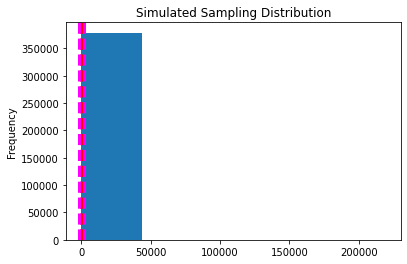

Sampling Mean: 105.61747578969052
Sampling StdErr: 907.1850347938928
95% Confidence Interval: (-1672.432519720055, 1883.6674712994363)


In [28]:
#BACKERS
backr = dtc['backers']
m = backr.mean()
sd = backr.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
backr.plot.hist(title='Simulated Sampling Distribution', bins=5) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=3)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

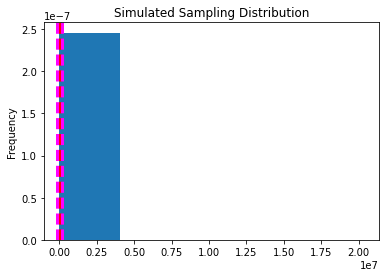

Sampling Mean: 9058.924074119337
Sampling StdErr: 90973.34310731708
95% Confidence Interval: (-169245.55196942732, 187363.400117666)


In [29]:
#usd_pledged_real
realp = dtc['usd_pledged_real']
m = realp.mean()
sd = realp.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
realp.plot.hist(title='Simulated Sampling Distribution', bins=5, density=True) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=3)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

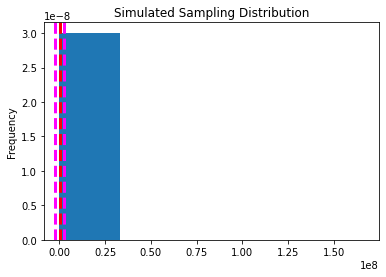

Sampling Mean: 45454.40146545336
Sampling StdErr: 1152950.0550883831
95% Confidence Interval: (-2214286.182481249, 2305194.9854121553)


In [30]:
#usd_goal_real
realg = dtc['usd_goal_real']
m = realg.mean()
sd = realg.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
realg.plot.hist(title='Simulated Sampling Distribution', bins=5, density=True) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=3)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

##**STEP 9 : Hypothesis Testing**
Membuat 1 Hipotesis Dan Menarik Kesimpulan Dari Data Yang Ada	, Disini saya menggunakan metode Two sample Test.

Membuat variable baru, membuat grup menggunakan data kolom kategori dan backers kemudian nilai yang diambil adalah count dan mean.

In [31]:
dtc_make_smy=dtc.groupby('category').agg({'backers':['count','mean']}).reset_index()
dtc_make_smy.columns = dtc_make_smy.columns.droplevel()

In [32]:
dtc_make_smy.sort_values('count',ascending=False).head(10)

,,count,mean
113,Product Design,22314,276.907
39,Documentary,16139,89.701
90,Music,15727,55.059
136,Tabletop Games,14180,426.601
129,Shorts,12357,36.731
148,Video Games,11830,373.585
58,Food,11493,66.734
55,Film & Video,10108,47.409
54,Fiction,9169,28.017
52,Fashion,8554,66.036


Kemudian membuat 2 variabel dari kolom kategori dan nilai yang diambil adalah Produk desain dan dokumentari.

In [33]:
df_prodes = dtc[dtc['category']=='Product Design']
df_docu = dtc[dtc['category']=='Documentary']

Kemudian melakukan plot untuk kedua variable tersebut.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


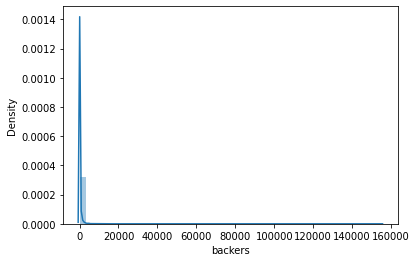

In [34]:
sns.distplot(df_prodes['backers'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


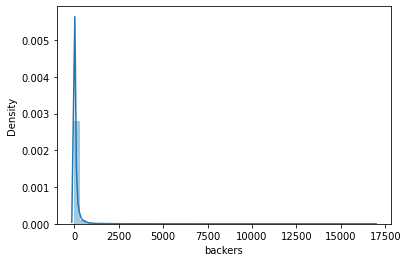

In [35]:
sns.distplot(df_docu['backers'])

##**STEP 10 : Preprocessing**
Mampu Melakukan Preproses Dataset Sebelum Melakukan Proses Statistik.

Product Design sample mean:276.90745720175676
Product Design sample std:1741.6066347321157
Product Design Kurtosis:3294.379367648098
Documentary sample mean:89.70053906685668
t-statistic:-15.734838482749915
p-value:0.000000


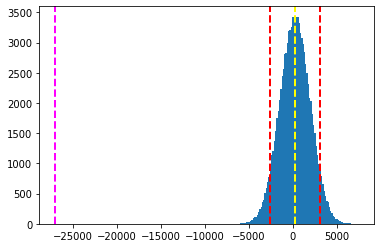

In [36]:
np.random.seed(123)
nonMath =df_prodes['backers']
math = df_docu['backers']
print("Product Design sample mean:" + str(nonMath.mean()))
print("Product Design sample std:" + str(nonMath.std()))
print("Product Design Kurtosis:" + str(nonMath.kurtosis()))
print("Documentary sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

##**KESIMPULAN :**
Hasil yang didapat dari pengerjaan project ini dapat disimpulakan alur pengerjaannya sebagai berikut :


*   Pertama seperti biasa yaitu mengerti cara melakukan importing library dan sebelum mengelola data, memahami kira-kira apa library yang dibutuhkan, karena isi data berisi nilai tipe data object, number, maka sudah jelas bahwa pandas dan numpy harus di import kemudian library tambahan yaitu scipy, matplotlib dan lain lain juga diperlukan.

*   Kemudian setelah berhasil melakukan import data, langkah berikutnya masuk ke tahap loading data, dengan menggunakan perintah read guna untuk membaca data dan kemudian data bisa ditampilkan dengan jelas

*   Lalu jika sudah meload data, langkah berikutnya adalah melakukan pembersihan atau cleaning dengan cara melihat apakah ada data yang kosong pada kolom tertentu dan jika ada kolom yang tidak terpakai bisa di drop atau dibuang, terakhir menggnati kolom yang semestinya akan digunakan ke dalam penulisan sintaks untuk memudahkan proses kalkulasi.

*   Kemudian melakukan eksplorasi secara sederhana untuk memahami konsep membuat query baru atau gruoping beberapa kolom menjadi 1 yang dikemas ke dalam variabel baru.

*   Masuk ke step kalkulasi, yang pertama disini adalah mengukur central tendency dan nilai yang dicari adalah mean, median, modus

*   Berikutnya adalah mengukur variance dan nilai yang dicari adalah range antar kolom, variance, standar defiasi dan saya menambhakan quantile.

*   Kemudian saya mengimplementasikan konsep Convidence Interval yang merupakan parameter untuk mengukur seberapa akurat Mean sebuah sample mencakup nilai Mean Populasi sesungguhnya.

*   Kemudian terakhi untuk hipotesis testing pertama Membuat variable baru, membuat grup menggunakan data kolom kategori dan backers kemudian nilai yang diambil adalah count dan mean. Kemudian membuat 2 variabel dari kolom kategori dan nilai yang diambil adalah Produk desain dan dokumentari lalu melakukan plot untuk kedua variable tersebut. Step terakhir membuat plot dari hasil hipotesis testing di tahap Preprocessing kemudian membuat plotnya dan untuk outputnya sebagai berikut :
- Product Design sample mean:276.90745720175676
- Product Design sample std:1741.6066347321157
- Product Design Kurtosis:3294.379367648098
- Documentary sample mean:89.70053906685668
- t-statistic:-15.734838482749915
- p-value:0.000000